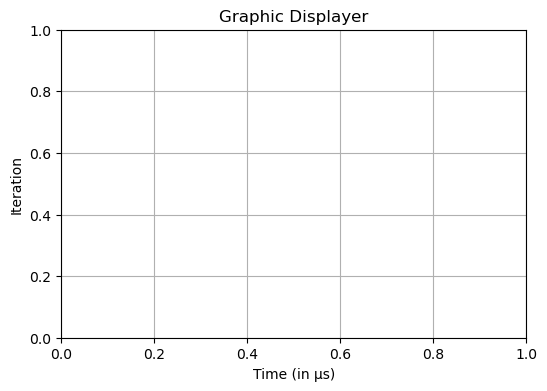

In [6]:
from modules.fileManaging import exit, open_file, plot_data
from modules.fitFunctions import add_erlang_fit, add_poisson_fit, add_gaussian_fit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import csv
from collections import defaultdict
import tkinter
from tkinter import filedialog
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from tkinter import *
import math
from scipy.stats import poisson
from tkinter import messagebox

# Screen
analysis = tkinter.Tk() # Définition d'un écran
analysis.geometry("1280x720") # Définition de la taille de l'écran
analysis.title("Desintegrations Nucleaires") # Définition du nom de l'application

# Titre de l'application
title = Label(text="Distribution de Poisson/Erlang", font=("Arial", 16, "bold")) # Définition du titre
title.pack() # Affichage du label

# Affichage d'un graphique vide initial
fig, ax = plt.subplots(figsize=(6, 4)) # Définition de sa taille
ax.set_title('Graphic Displayer') # Titre
ax.set_xlabel('Time (in µs)') # Abscisse
ax.set_ylabel('Iteration') # Ordonnée
ax.grid(True) # Affichage d'une grille

# Définition du canvas initial
canvas = FigureCanvasTkAgg(fig, master=analysis)
canvas.draw()
canvas.get_tk_widget().pack()

data = defaultdict(list) # Liste de données pour la lecture du fichier csv
user_input = 0 # Fréquence du signal pour l'adaptation de l'échelle des abscisses
selected_value = tkinter.IntVar()  # Variable k
selected_value.set(1) # Valeur par défaut

# Fonction pour gérer l'appel à open_file et récupérer les données
def load_file():
    global data
    data = open_file(canvas, ax, user_input) # Récupération des données lues par la fonction open_file
    if data is not None: # Verification du chargement des données
        print("Data loaded successfully")
    else:
        print("No data loaded")





def show_entry_value():
    try:
        global user_input
        # Récupérer la valeur saisie et la convertir en entier
        user_input = int(entry.get())
        # Afficher la valeur saisie dans une boîte de message
        messagebox.showinfo("Information", f"Vous avez saisi : {user_input}")
        # Vous pouvez également utiliser la valeur ici pour d'autres opérations
        print(f"Valeur saisie : {user_input}")
    except ValueError:
        # Afficher un message d'erreur si la saisie n'est pas un entier
        messagebox.showerror("Erreur", "Veuillez entrer un entier valide.")
        entry.delete(0, tk.END)
        entry.insert(0, "0")  # Réinitialiser à une valeur par défaut  



############################## Configuration des boutons et menus ##############################

# Bouton pour charger un fichier CSV
b1 = Button(text="Load CSV", command=load_file) # Bouton pour sélectionner et afficher des données
b1.place(x=60,y=100)

# Bouton pour quitter l'application (non fonctionnel pour le moment)
bclose = Button(text="Close Application", command=(exit)) # Bouton pour fermer l'application
bclose.place(x=60,y=220)

# Ajouter un label
label = tkinter.Label(analysis, text="Enter frequency value :")
label.place(x=60, y=360)

# Ajouter une zone de texte (Entry)
entry = tkinter.Entry(analysis, width=20)
entry.place(x=60, y=380)
entry.insert(0, 0)

# Ajouter un bouton pour récupérer la valeur saisie
button_confirm = tkinter.Button(analysis, text="Confirm", command=show_entry_value)
button_confirm.place(x=60, y=400)


# Menu déroulant pour la sélection du facteur k

options = list(range(1, 10)) # Definition de la liste d'options
selected_value = tkinter.IntVar() # Declaration de la variable de selection
selected_value.set(options[0])  # Sélectionne la première option par défaut
option_menu = tkinter.OptionMenu(analysis, selected_value, *options) # Definition du menu sur le screen
option_menu.place(x=120,y=140) # Position du menu
l2 = Label(text="k Factor") # Définition du titre
l2.place(x=60,y=145) # Affichage du label

# Bouton pour tracer l'Exponentielle
button_exp = Button(text="Add Exponential Fit", command=lambda: add_erlang_fit(data, canvas, ax, selected_value, user_input))
button_exp.place(x=60,y=180)

# Bouton pour tracer la Gaussienne
button_gaussian = tkinter.Button(analysis, text="Add Gaussian Fit", command=lambda: add_gaussian_fit(data, canvas, ax, user_input))
button_gaussian.place(x=60,y=260)

# Bouton pour tracer Poisson
button_poisson = tkinter.Button(analysis, text="Add Poisson Fit", command=lambda: add_poisson_fit(data, canvas, ax, user_input))
button_poisson.place(x=60,y=300)






# Loop
analysis.mainloop() # Pour maintenir l'application ouverte
